In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from pandas.api.types import is_numeric_dtype
from keras.layers import Dropout
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from tensorflow.keras.metrics import Precision, Recall

In [2]:
data = pd.read_excel('./Raisin_Dataset/Raisin_Dataset.xlsx',)
df = pd.read_excel('./Raisin_Dataset/Raisin_Dataset.xlsx',)
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [3]:
df2 = df.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
data['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

Text(0.5, 1.0, 'Label')

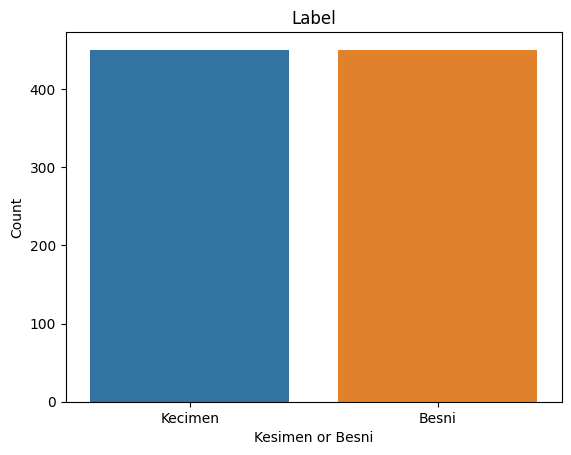

In [6]:
sns.countplot(data = data, x="Class")
plt.xlabel("Kesimen or Besni")
plt.ylabel("Count")
plt.title("Label")

In [7]:
missing_values = data.isnull().sum()
missing_values

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

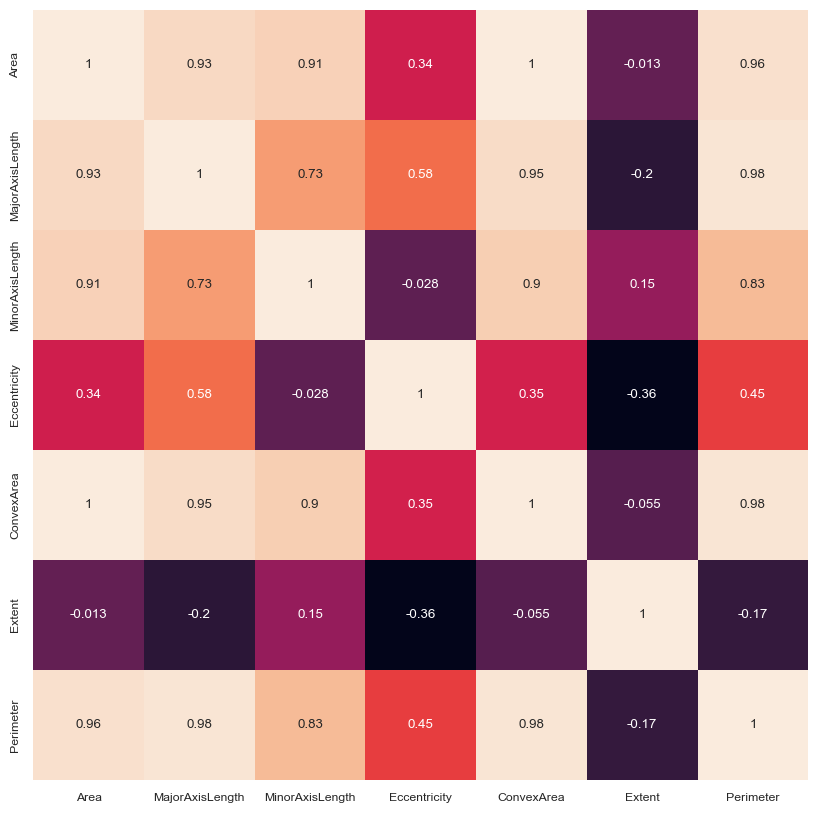

In [8]:
df_corr = data.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [9]:
df['Class'] = LabelEncoder().fit_transform(df['Class'])

In [10]:
for i in data.columns:
    if is_numeric_dtype(data[i]):
        data[i]=preprocessing.MinMaxScaler().fit_transform(data[[i]])
    else:
        data[i]=preprocessing.LabelEncoder().fit_transform(data[[i]])
data

c:\Users\OWNER\miniconda3\envs\dl\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,0.296370,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791,1
1,0.237427,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842,1
2,0.312263,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594,1
3,0.097973,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284,1
4,0.257660,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493,1
...,...,...,...,...,...,...,...,...
895,0.275975,0.264945,0.298733,0.763836,0.236831,0.634192,0.245347,0
896,0.295540,0.278757,0.331595,0.749761,0.256905,0.563259,0.286325,0
897,0.354240,0.267056,0.445044,0.608017,0.317858,0.792897,0.324126,0
898,0.324983,0.324902,0.316915,0.810259,0.283698,0.612254,0.307635,0


In [11]:
for i in df2.columns:
    if is_numeric_dtype(df2[i]):
        df2[i]=preprocessing.StandardScaler().fit_transform(data[[i]])
    else:
        df2[i]=preprocessing.LabelEncoder().fit_transform(data[[i]])
df2

c:\Users\OWNER\miniconda3\envs\dl\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,-0.007186,0.097577,-0.023958,0.423142,-0.015709,1.106743,0.066274,1
1,-0.324217,-0.209012,-0.229292,0.224476,-0.304248,-0.287777,-0.161252,1
2,0.078292,0.097758,0.236988,0.186239,0.062113,-1.158250,0.155945,1
3,-1.074286,-1.245051,-0.915273,-1.069623,-1.076165,0.001711,-1.175915,1
4,-0.215393,-0.678958,0.727354,-2.409827,-0.238623,1.745259,-0.338639,1
...,...,...,...,...,...,...,...,...
895,-0.116882,-0.007352,-0.133092,0.395714,-0.131228,-0.574773,-0.134624,0
896,-0.011650,0.084554,0.096175,0.300071,-0.007046,-1.179518,0.176693,0
897,0.304072,0.006700,0.887674,-0.663114,0.370041,0.778289,0.463873,0
898,0.146711,0.391600,-0.006246,0.711173,0.158710,-0.761804,0.338586,0


In [12]:
def remove_outliers(df, threshold=3):
    """
    각 특성에서 이상치를 확인하고 제거하는 함수

    Parameters:
    - df (DataFrame): 이상치를 제거할 데이터프레임
    - threshold (int or float): 이상치를 판단하기 위한 임계값 (기본값: 3)

    Returns:
    - cleaned_df (DataFrame): 이상치가 제거된 데이터프레임
    """
    cleaned_df = df.copy()
    
    for column in df.columns:
        if np.issubdtype(df[column].dtype, np.number):  # 숫자 타입인 열만 처리
            mean = df[column].mean()
            std = df[column].std()
            z_scores = (df[column] - mean) / std
            outliers = (z_scores.abs() > threshold)
            cleaned_df = cleaned_df[~outliers]
    
    return cleaned_df

In [13]:
# 이상치 제거 함수 호출 (임계값을 지정하지 않으면 기본값인 3 사용)
cleaned_data = remove_outliers(data)
cleaned_df2 = remove_outliers(df2)

# 이상치가 제거된 데이터프레임 출력
print(cleaned_data)

         Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    0.296370         0.280714         0.314376      0.767872    0.255504   
1    0.237427         0.234638         0.284945      0.738636    0.208864   
2    0.312263         0.280741         0.351778      0.733009    0.268084   
3    0.097973         0.078935         0.186620      0.548194    0.084089   
4    0.257660         0.164011         0.422064      0.350968    0.219472   
..        ...              ...              ...           ...         ...   
895  0.275975         0.264945         0.298733      0.763836    0.236831   
896  0.295540         0.278757         0.331595      0.749761    0.256905   
897  0.354240         0.267056         0.445044      0.608017    0.317858   
898  0.324983         0.324902         0.316915      0.810259    0.283698   
899  0.287236         0.371214         0.205302      0.910695    0.250153   

       Extent  Perimeter  Class  
0    0.831422   0.271791      1  
1    0.

c:\Users\OWNER\miniconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [14]:
cleaned_df2

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,-0.007186,0.097577,-0.023958,0.423142,-0.015709,1.106743,0.066274,1
1,-0.324217,-0.209012,-0.229292,0.224476,-0.304248,-0.287777,-0.161252,1
2,0.078292,0.097758,0.236988,0.186239,0.062113,-1.158250,0.155945,1
3,-1.074286,-1.245051,-0.915273,-1.069623,-1.076165,0.001711,-1.175915,1
4,-0.215393,-0.678958,0.727354,-2.409827,-0.238623,1.745259,-0.338639,1
...,...,...,...,...,...,...,...,...
895,-0.116882,-0.007352,-0.133092,0.395714,-0.131228,-0.574773,-0.134624,0
896,-0.011650,0.084554,0.096175,0.300071,-0.007046,-1.179518,0.176693,0
897,0.304072,0.006700,0.887674,-0.663114,0.370041,0.778289,0.463873,0
898,0.146711,0.391600,-0.006246,0.711173,0.158710,-0.761804,0.338586,0


In [15]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [16]:
# 이상치 제거 X, Standardscaler O 
X = df2.drop('Class', axis=1)
y = df2['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [17]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy', Precision(), Recall()])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

# 모델 평가
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print(f'테스트 손실: {loss}, 테스트 정확도: {accuracy}')

Epoch 1/50
 1/20 [>.............................] - ETA: 0s - loss: 0.3386 - accuracy: 0.9375 - precision: 0.8889 - recall: 1.0000

20/20 [==============================] - 0s 6ms/step - loss: 0.3472 - accuracy: 0.8587 - precision: 0.8427 - recall: 0.8875 - val_loss: 0.3127 - val_accuracy: 0.9000 - val_precision: 0.8759 - val_recall: 0.9231
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3514 - accuracy: 0.8540 - precision: 0.8413 - recall: 0.8781 - val_loss: 0.3124 - val_accuracy: 0.9037 - val_precision: 0.8768 - val_recall: 0.9308
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3482 - accuracy: 0.8571 - precision: 0.8464 - recall: 0.8781 - val_loss: 0.3118 - val_accuracy: 0.9037 - val_precision: 0.8768 - val_recall: 0.9308
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.3474 - accuracy: 0.8667 - precision: 0.8512 - recall: 0.8938 - val_loss: 0.3115 - val_accuracy: 0.9000 - val_precision: 0.8705 - val_recall: 0.9308
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.3556 - accuracy: 0.8619 - precision: 0.8498 - rec

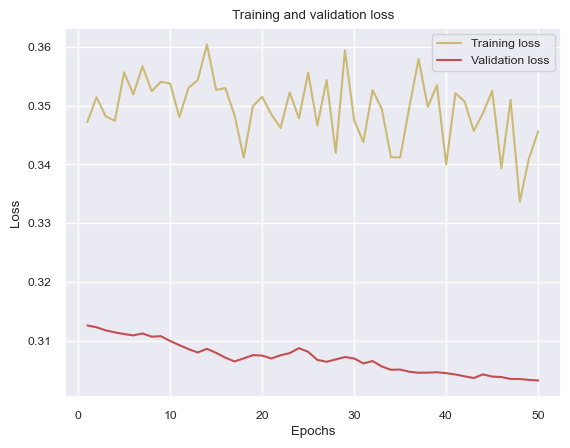

In [20]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

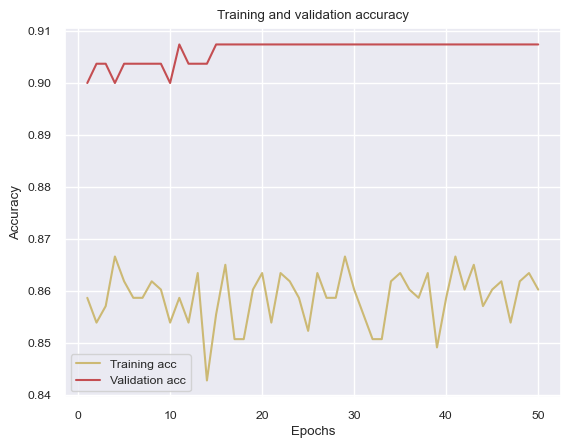

In [21]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
# 모델 평가 (F1 스코어 확인)
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'F1 Score: {f1_score}')

9/9 [==============================] - 0s 1ms/step - loss: 0.3033 - accuracy: 0.9074 - precision: 0.8777 - recall: 0.9385
F1 Score: 0.9070631900376471
